# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,35,1787,192,99,72,25,391,216,996,12959
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,149,9592,1167,192,269,403,3799,1788,7619,55977
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,276,5603,1052,140,230,106,508,1186,3222,47203
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,186,7242,629,152,152,37,120,196,1285,55089


## 1.1 Observing data
Oberserve the unique regions in the dataset

In [3]:
## Oberserve the unique region's in the dataset
print('Unique region ids we have:', sorted(df['region_id'].unique()))

Unique region ids we have: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


## 1.2 Cleaning data
a : includes all the classes of the vehicles

In [4]:
a = df[['year', 'region_id', 'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles']]
a = a.dropna()
a.head()

,year,region_id,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,2019,5,1.74,214,91,22425,391,2768,253,25927
1,2019,3,0.68,2,23,10119,35,1787,996,12959
2,2019,9,1.30,0,455,38163,149,9592,7619,55977
3,2019,4,1.74,0,184,37918,276,5603,3222,47203
4,2019,5,0.31,0,159,46216,186,7242,1285,55089


In [5]:
round(a.describe(),2)

,year,region_id,link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
count,376392.00,376392.00,376392.00,376392.00,376392.00,376392.00,376392.00,376392.00,376392.00,376392.00
mean,2010.05,5.86,1.75,123.75,211.35,16455.15,228.99,2682.07,1218.74,20796.29
std,6.05,2.99,2.38,423.40,390.05,16388.51,356.73,2955.21,2420.54,21386.80
min,2000.00,1.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2005.00,3.00,0.37,5.00,57.00,6926.00,54.00,1091.00,236.00,8727.00
50%,2010.00,6.00,0.93,26.00,110.00,11938.00,115.00,1813.00,466.00,14774.00
75%,2015.00,9.00,2.05,86.00,208.00,19435.00,254.00,3019.00,1005.00,24077.25
max,2020.00,11.00,41.07,18629.00,9815.00,207133.00,11359.00,40479.00,31198.00,262842.00


In [6]:
gp = a.groupby(['year','region_id'], as_index=False).sum()

## 1.3 Millage per Region & Vehicle Type

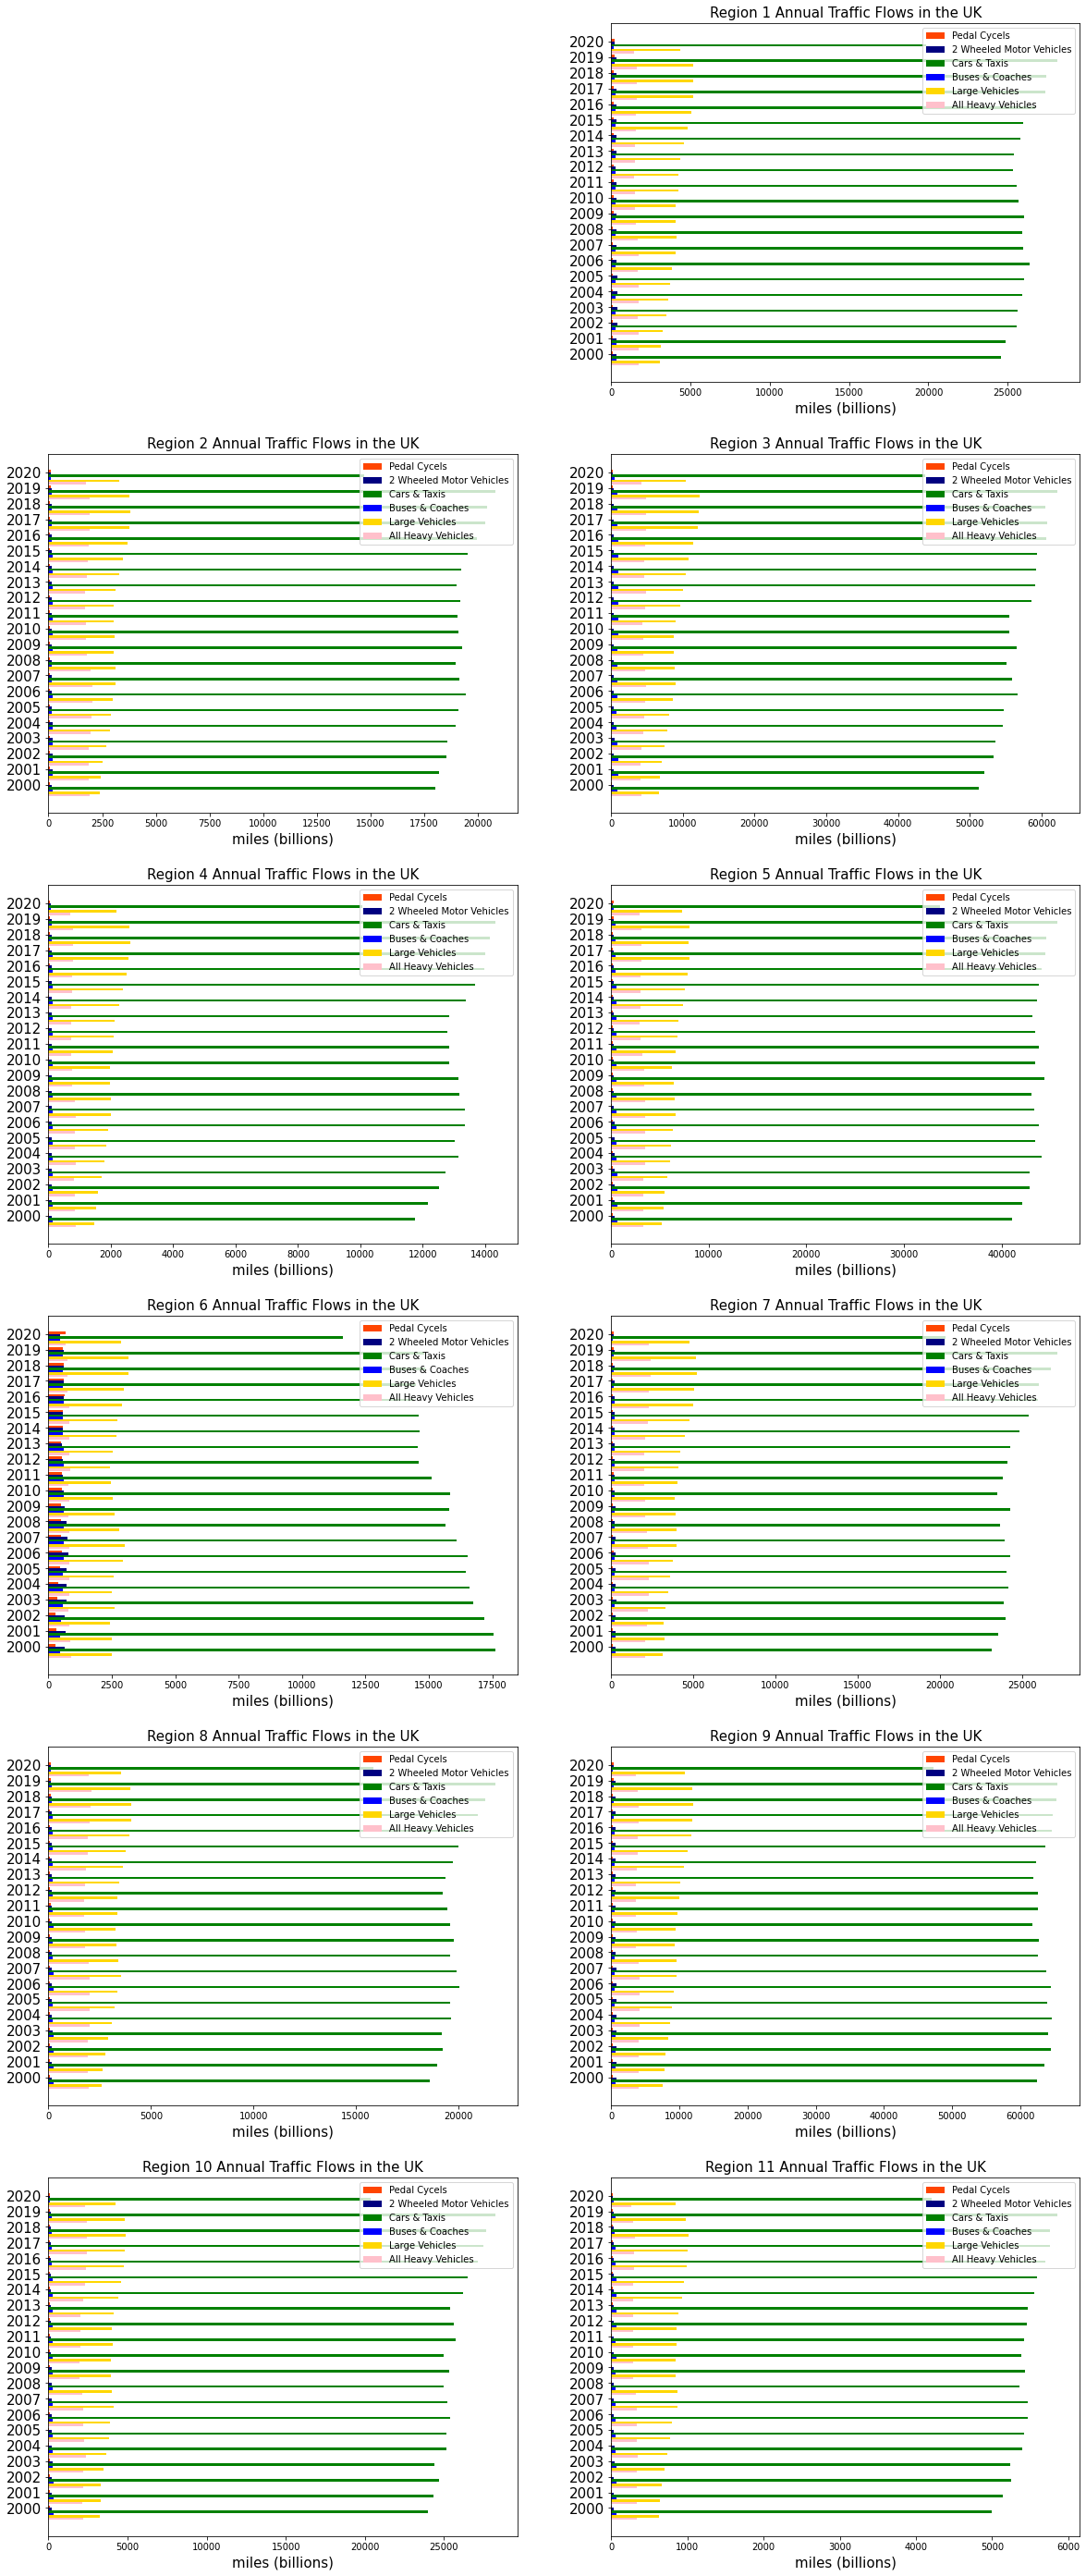

In [7]:
# fig, ax = plt.subplots(figsize=(8,10))
fig = plt.figure(figsize=(20,50))
for i in range(1,12):
    ax = fig.add_subplot(6,2,i+1)
    legends = ['Pedal Cycels', '2 Wheeled Motor Vehicles', 'Cars & Taxis', 'Buses & Coaches', 'Large Vehicles', 'All Heavy Vehicles']
    width=0.15


    labels = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
    x = np.arange(len(labels))
#     print(i)
    b1 = plt.barh(x, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['pedal_cycles']*365/1000000000, width, label="Bar 1", color='orangered')
    b2 = plt.barh(x - width, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['two_wheeled_motor_vehicles']*365/1000000000, width, label="Bar 2", color='navy')
    b3 = plt.barh(x - width*2, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['cars_and_taxis']*365/1000000000, width, label="Bar 3", color='g')
    b4 = plt.barh(x - width*3, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['buses_and_coaches']*365/1000000000, width, label="Bar 3", color='b')
    b5 = plt.barh(x - width*4, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['lgvs']*365/1000000000, width, label="Bar 3", color='gold')
    b6 = plt.barh(x - width*5, gp[(gp['region_id']==i)]['link_length_miles']*gp[(gp['region_id']==i)]['all_hgvs']*365/1000000000, width, label="Bar 3", color='pink')


    ax.set(yticks=x-width/2, yticklabels=labels)

    plt.legend(legends)
    plt.title('Region '+str(i)+' Annual Traffic Flows in the UK', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('miles (billions)', fontsize=15)
plt.show()
# fig.savefig('barchart.png')

## 1.4 Annual Trend Presentation

In [8]:
b_gp = a.groupby('year').sum()
b_gp = b_gp.reset_index()

In [9]:
df['annual_vol'] = df['link_length_miles'] * df['all_motor_vehicles'] * 365 / (10**9)
sum_df = df.groupby('year')[['annual_vol']].sum().reset_index()

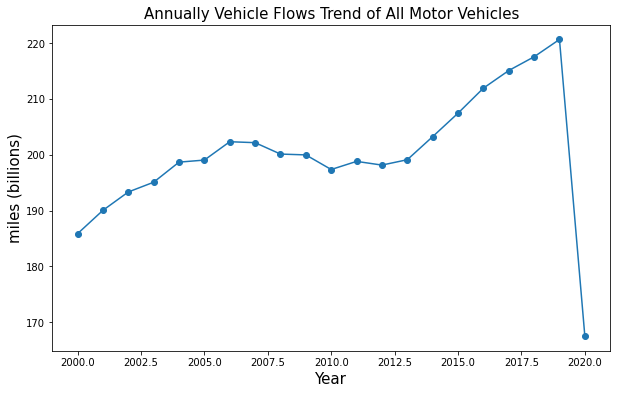

In [10]:
plt.figure(figsize=(10,6))
plt.plot(b_gp['year'], sum_df['annual_vol'], marker='o')
plt.title('Annually Vehicle Flows Trend of All Motor Vehicles', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('miles (billions)', fontsize=15)
plt.show()

## 1.5 What may cause the trend?
The line graph above illustrates a sudden drop in 2020. Let's figure out why cause this trend?

The table below shows that link_length_miles did not drop from 2019 to 2020. However, all_motor_vehicles have a significant decrease between 2019 and 2020. I think it is because of Covid-19 that cause people came out not frequently.

In [11]:
b_gp[(b_gp['year']==2019) | (b_gp['year']==2020)][['year','link_length_miles','all_motor_vehicles']]

,year,link_length_miles,all_motor_vehicles
19,2019,31803.82,396479341
20,2020,31837.66,301999082


# Task 2

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 2.1. Regression Model


For this task, **I will use Linear regression**, equivalent to polynomial degree 1. I believe linear regression can express the upward trend the most and ignore the abnormal data point (2020).

From the line graph above, we can see that it is always an upward trend except for 2020, which has a significant drop from 2019 to 2020 caused by Covid-19. In this case, there is a **potential risk**: if we use polynomial regression, which degree more than 2, it will cause our regression to learn the abnormal situation and predict a downward trend and have a negative number at the end of the next 30 year.

In [13]:
## Training set
X = sum_df.iloc[:, 0].values.reshape(-1,1)
y = sum_df.iloc[:, -1].values.reshape(-1,1)

## Set up testing set to predict
X_test = [2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050]
X_test = np.array(X_test)

## linear regression = polynomial regression degree 1
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

## 2.2 Prediction Data

In [14]:
pred = []
for i in X_test:
#     print(i,':', lin_reg_2.predict(poly_reg.fit_transform([[i]])))
    pred.append(lin_reg.predict(poly_reg.fit_transform([[i]])))

## Make a new dataframe for prediction data
data = {'year':X_test,
   'annual_vol':pred}
df_marks = pd.DataFrame(data)

## Append prediction data into original dataframe
old_c = sum_df.copy()
c = old_c.append(df_marks).reset_index(drop=True)
c.head()

,year,annual_vol
0,2000,185.873
1,2001,190.053
2,2002,193.337
3,2003,195.084
4,2004,198.678


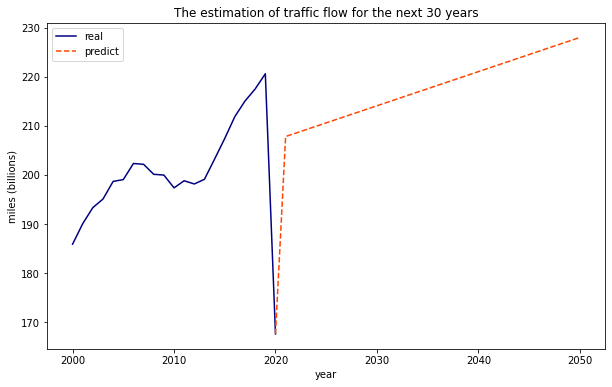

In [15]:
plt.figure(figsize=(10,6))

plt.plot(c['year'][:21], c['annual_vol'][:21], color='navy', label='real')
plt.plot(c['year'][20:], c['annual_vol'][20:], color='orangered', label='predict',linestyle='dashed')
plt.legend()
plt.title('The estimation of traffic flow for the next 30 years')
plt.xlabel('year')
plt.ylabel('miles (billions)')
plt.show()

# Task 3

## 3.1 Realistic Data
Observing the data from https://www.gov.uk/government/statistical-data-sets/all-vehicles-veh01#ultra-low-emissions-vehicles-ulevs. I collected two different file, one is VEH0101, which contains the numbers of non-electric cars in the UK counted in thousand. The other is VEH0130, that contains the electric cars in the UK counted in thousand.

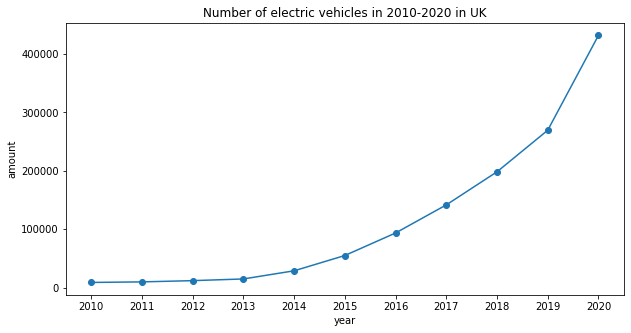

In [16]:
veh_data = {'year':  [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
        'nonelec': [34120, 34229, 34522, 35034, 35633, 36468, 37257, 37735, 38184, 38683, 38582],
        'elec': [8991, 9954, 12064, 14967, 28899, 55059, 93589, 141647, 198260, 269377, 431663]}

veh_df = pd.DataFrame(veh_data)
veh_df['total'] = veh_df['nonelec'] + veh_df['elec']
veh_df['electric_percentage'] = veh_df['elec']/ veh_df['total']


plt.figure(figsize=(10,5))
default = range(len(veh_df['year']))
plt.plot(default, veh_df['elec'], marker='o')
plt.title('Number of electric vehicles in 2010-2020 in UK')
plt.xlabel('year')
plt.xticks(default, veh_df['year'])
plt.ylabel('amount')
plt.show()

## 3.2 Obeservation Data
To see the traffic flow from the electric vehicles.

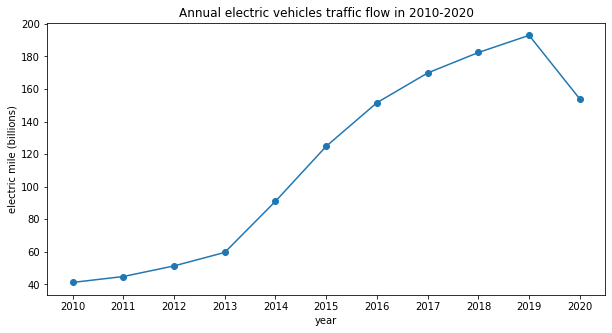

In [17]:
v_df = sum_df.iloc[10:, :].reset_index()
veh_df['elec_miles'] = v_df['annual_vol']*veh_df['electric_percentage']

p_df = pd.DataFrame()
p_df['year'] = veh_df['year']
p_df['elec_miles'] = veh_df['elec_miles']

plt.figure(figsize=(10,5))
plt.plot(default, veh_df['elec_miles'], marker='o')
plt.title('Annual electric vehicles traffic flow in 2010-2020')
plt.xlabel('year')
plt.xticks(default, veh_df['year'])
plt.ylabel('electric mile (billions)')

plt.show()

## 3.3 Estimate the electric vehicle trend
In this task, I also use the **linear regression** to predict the electric vehicle trend in next 30 years.

In [18]:
X2 = p_df.iloc[:, 0].values.reshape(-1,1)
y2 = p_df.iloc[:, -1].values.reshape(-1,1)

## Set up testing set to predict
X_test = [2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050]
X_test = np.array(X_test)

poly_reg = PolynomialFeatures(degree = 1)
X_poly2 = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y2)


LinearRegression()

In [19]:
pred = []
for i in X_test:
#     print(i,':', lin_reg_2.predict(poly_reg.fit_transform([[i]])))
    pred.append(lin_reg_2.predict(poly_reg.fit_transform([[i]])))

## Make a new dataframe for prediction data
data = {'year':X_test,
   'elec_miles':pred}
df_marks_2 = pd.DataFrame(data)

old_a = p_df.copy()
c2 = old_a.append(df_marks_2).reset_index(drop=True)
c2.head()

,year,elec_miles
0,2010,41.1603
1,2011,44.7906
2,2012,51.3133
3,2013,59.6006
4,2014,91.015


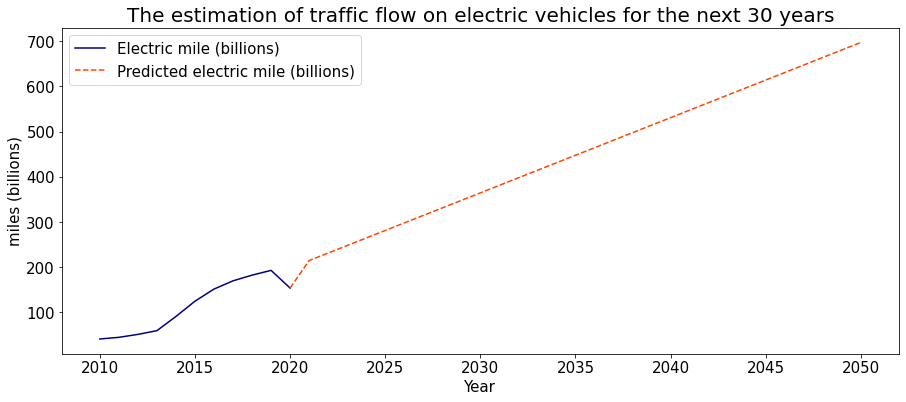

In [20]:
plt.figure(figsize=(15,6))
plt.plot(c2["year"][:11], c2["elec_miles"][:11],color='navy', label="Electric mile (billions)")
plt.plot(c2["year"][10:], c2['elec_miles'][10:], color='orangered',linestyle='dashed', label="Predicted electric mile (billions)")
plt.xticks(fontsize=15)
plt.title('The estimation of traffic flow on electric vehicles for the next 30 years', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('miles (billions)', fontsize=15)
plt.legend(fontsize=15)
plt.show()

## 3.4 Estimation of power generation

The average electric vehicle power consumption is 0.3 KWh per mile, which I referred from https://ev-database.uk/cheatsheet/energy-consumption-electric-car.

In [21]:
c2['power (TWhr)'] = c2['elec_miles']*314*10**(-3)
p_df['power (TWhr)'] = p_df['elec_miles']*314*10**(-3)

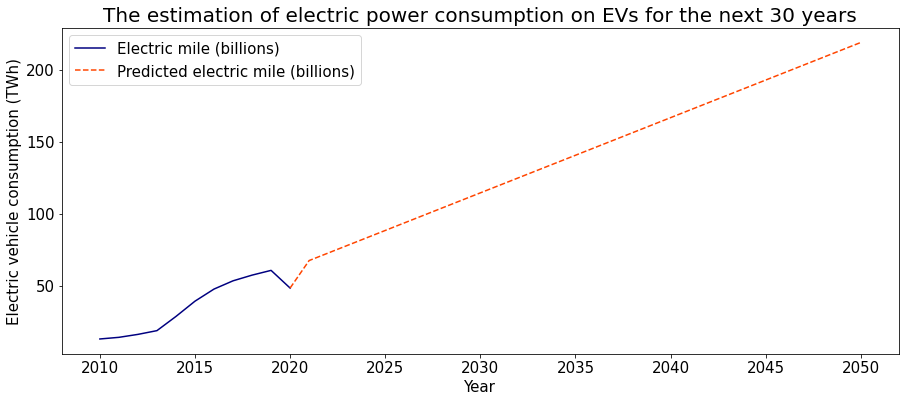

In [22]:
plt.figure(figsize=(15,6))
plt.plot(c2["year"][:11], c2["power (TWhr)"][:11],color='navy', label="Electric mile (billions)")
plt.plot(c2["year"][10:], c2['power (TWhr)'][10:], color='orangered',linestyle='dashed', label="Predicted electric mile (billions)")
plt.xticks(fontsize=15)
plt.title('The estimation of electric power consumption on EVs for the next 30 years', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Electric vehicle consumption (TWh)', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [23]:
def remove_bracket(x):
    
    x = str(x)
    x = x.replace('[','')
    x = x.replace(']','')
    x = float(x)
    x = round(x,2)
    return x
c2['elec_miles'] = c2['elec_miles'].apply(remove_bracket)
c2['power (TWhr)'] = c2['power (TWhr)'].apply(remove_bracket)

print('Power Concumption Table')
c2

Power Concumption Table


,year,elec_miles,power (TWhr)
0,2010,41.16,12.92
1,2011,44.79,14.06
2,2012,51.31,16.11
3,2013,59.60,18.71
4,2014,91.01,28.58
5,2015,124.79,39.18
6,2016,151.58,47.60
7,2017,169.83,53.33
8,2018,182.41,57.28
9,2019,192.93,60.58


# Task 4
## 4.1 Recommendation

From ELECTRICITY GENERATION COSTS 2020, we can access on https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf. 

I recommend that we use **onshore wind and large-scale of solar PV before 2035** and change to **offshore wind and large-scale of solar PV after 2035**. Onshore wind and solar PV are the two least expensive forms of renewable energy and significantly cheaper than offshore wind power.[1] After 2035, people predict that offshore wind and solar PV will become the two least expensive power. Solar PV can work much better in the gleaming summer months than in the dark days of winter.[2] Therefore, we can use onshore wind as the alternative method on dark days of winter because we have stronger wind in winters.

For onshore wind and large-scale solar PV, we have reviewed capital costs and developed an updated learning rate – the rate at which capital costs decrease as more plants are built, resulting from greater technical and construction experience – to reflect the projected decreases in capital costs over time. We have also reviewed technical assumptions for small-scale solar PV (<4kW, 4-10kW, 10-50kW) – updated assumptions are available in the accompanying Key Data and Assumptions file. (page 9)[3]

### References

[1] https://www.nationalgrid.com/stories/energy-explained/onshore-vs-offshore-wind-energy

[2] https://www.theecoexperts.co.uk/solar-panels/pros-and-cons

[3] https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf.